## Transfer Learning with Inception-V3

In [1]:
import numpy as np
import PIL
import cv2
import pathlib
import tensorflow
import tensorflow_hub as hub
from tensorflow import keras
from keras import Model,layers,Sequential

In [2]:
# Here insted of fish image you can use any dataset for prediction in model.predict()
data_path = 'DataSets/CatVsDog'
my_data = pathlib.Path(data_path)
cat_data = list(my_data.glob('cats/*.jpg'))
dog_data = list(my_data.glob('dogs/*.jpg'))

In [3]:
class_data = {
    
    'cat' : list(my_data.glob('cats/*.jpg')),
    'dog' : list(my_data.glob('dogs/*.jpg'))
}

class_label = {
    
    'cat' : 0,
    'dog' : 1
}

In [4]:
X,y = [],[]
for pet_name , images in class_data.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img,(299,299))
        X.append(img_resize)
        y.append(class_label[pet_name])

In [5]:
X = np.array(X)
y = np.array(y)
X_scale = X / 255

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.2)

In [7]:
image_size = (299,299)
inception_model = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4", output_shape=[1001])
])
inception_model.build([None, 299, 299, 3])

In [8]:
clf = Sequential([
    
    inception_model,
    layers.Dense(2)
    
    
])
clf.compile(optimizer = 'adam',loss =  'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [9]:
clf.fit(X_train,y_train,epochs = 5)

Epoch 1/5
50/50 [==============================] - 104s 2s/step - loss: 0.7198 - accuracy: 0.8908
Epoch 2/5
50/50 [==============================] - 83s 2s/step - loss: 0.4174 - accuracy: 0.9527
Epoch 3/5
50/50 [==============================] - 85s 2s/step - loss: 0.4278 - accuracy: 0.9499
Epoch 4/5
50/50 [==============================] - 88s 2s/step - loss: 0.3823 - accuracy: 0.9670
Epoch 5/5
50/50 [==============================] - 86s 2s/step - loss: 0.3751 - accuracy: 0.9501


In [11]:
clf.evaluate(X_test,y_test)
# Compare model test accuracy with notebook M and Q

13/13 [==============================] - 20s 1s/step - loss: 0.4028 - accuracy: 0.9626


[0.40278762578964233, 0.9625934958457947]

In [12]:
y_p = clf.predict(X_test)
predicted = []
for i in range(len(y_p)):
    predicted.append(np.argmax(y_p[i]))

In [13]:
truth = y_test

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(truth,predicted)
print(classification_report(truth,predicted))
# compare accuracy and f1-score with notebook M and Q

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       214
           1       0.94      0.98      0.96       187

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401



<AxesSubplot:>

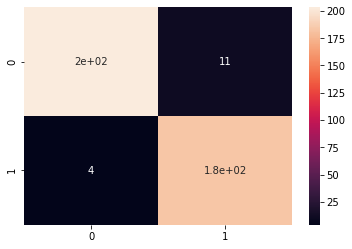

In [15]:
import seaborn as sn
sn.heatmap(cm,annot=True)